In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import cv2
import matplotlib.pyplot as plt
import numpy as np


# Load the MNIST Fashion dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) # Reshape to 28x28 grayscale images
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32') / 255 # Normalize pixel values to range [0, 1]
x_test = x_test.astype('float32') / 255




# Define the labels corresponding to the fashion categories
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

Dataset samples:
Image: 1
Label: 9
Class Name: Ankle boot
Image Data:


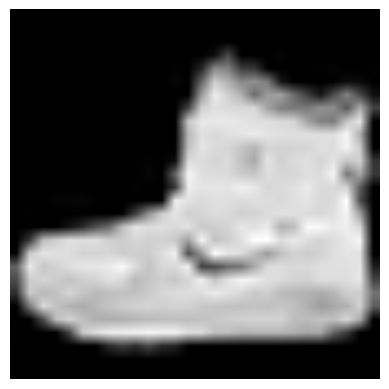


Image: 2
Label: 0
Class Name: T-shirt/top
Image Data:


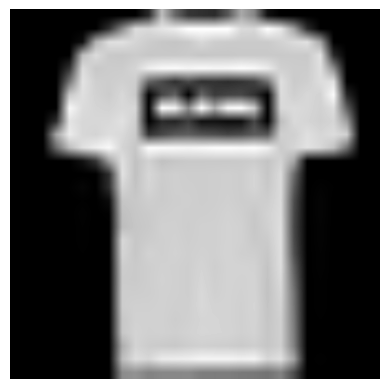


Image: 3
Label: 0
Class Name: T-shirt/top
Image Data:


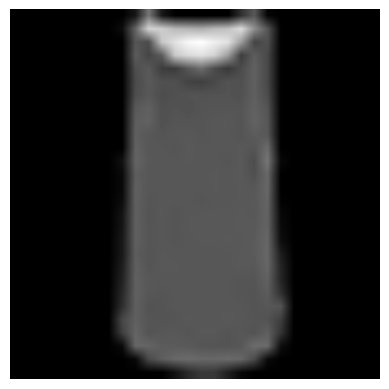

In [23]:
# Display few dataset samples
print("Dataset samples:")
for i in range(3):
    print("Image:", i+1)
    print("Label:", y_train[i])
    print("Class Name:", class_names[y_train[i]])
    print("Image Data:")
    resized_image = cv2.resize(x_train[i], (800, 800))
    plt.imshow(resized_image, cmap='gray')
    plt.axis('off')
    plt.show()
    print()

Y_train = to_categorical(y_train, num_classes=10) # Convert labels to one-hot encoded vectors
Y_test = to_categorical(y_test, num_classes=10)

In [24]:
# Define the model architecture
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, Y_train, batch_size=128, epochs=10, validation_data=(x_test, Y_test))


Epoch 1/10
469/469 [==============================] - 5s 6ms/step - loss: 0.6574 - accuracy: 0.7600 - val_loss: 0.4437 - val_accuracy: 0.8345
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4305 - accuracy: 0.8449 - val_loss: 0.3643 - val_accuracy: 0.8675
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3757 - accuracy: 0.8650 - val_loss: 0.3431 - val_accuracy: 0.8761
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3448 - accuracy: 0.8752 - val_loss: 0.3079 - val_accuracy: 0.8904
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3204 - accuracy: 0.8834 - val_loss: 0.2975 - val_accuracy: 0.8939
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3015 - accuracy: 0.8925 - val_loss: 0.2850 - val_accuracy: 0.8988
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2860 - accuracy: 0.8967 - val_loss: 0.2685 - val_accuracy: 0.9021
Epoch 

In [26]:
# Evaluate the model on the testing set
loss, accuracy = model.evaluate(x_test, Y_test)
print("Testing loss:", loss)
print("Testing accuracy:", accuracy)


predictions = model.predict(x_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.2526 - accuracy: 0.9081
Testing loss: 0.252633273601532
Testing accuracy: 0.9081000089645386
313/313 [==============================] - 1s 2ms/step


Sample predictions:
Predicted label: Dress
Actual label: Dress

Image Data:


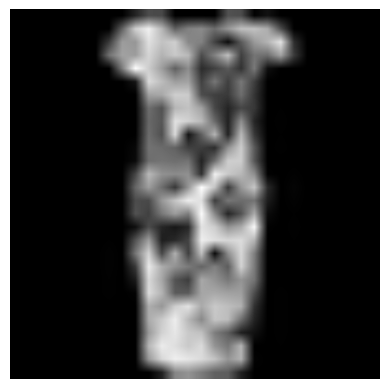


Predicted label: Shirt
Actual label: Shirt

Image Data:


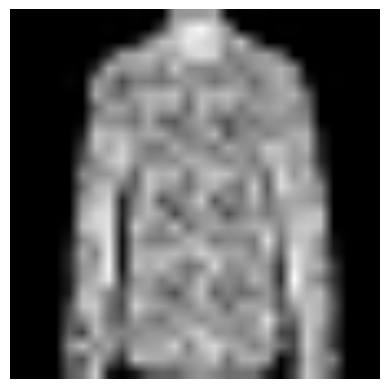


Predicted label: Sneaker
Actual label: Sneaker

Image Data:


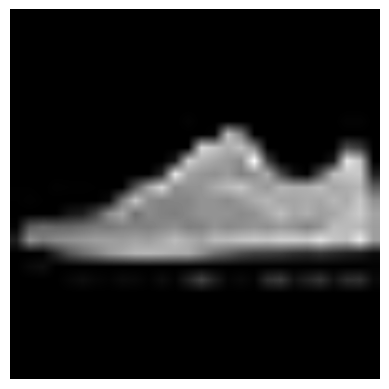


Predicted label: Shirt
Actual label: Pullover

Image Data:


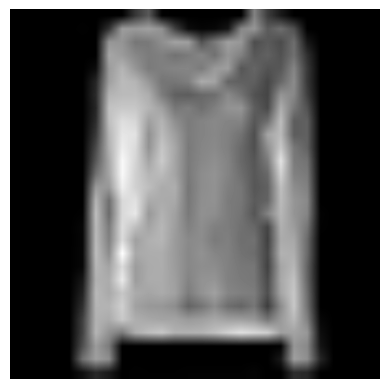


Predicted label: Sneaker
Actual label: Sneaker

Image Data:


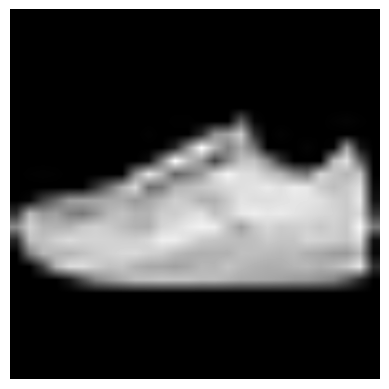

In [28]:

print("Sample predictions:")
for i in range(100,105):
    predicted_label = np.argmax(predictions[i])
    actual_label = y_test[i]
    print("Predicted label:", class_names[predicted_label])
    print("Actual label:", class_names[actual_label])
    print()
    print("Image Data:")
    resized_image = cv2.resize(x_test[i], (750, 750))
    plt.imshow(resized_image, cmap='gray')
    plt.axis('off')
    plt.show()
    print()